In [18]:
pip install yfinance

                                              0.0/60.3 kB ? eta -:--:--
     ------------                           20.5/60.3 kB 682.7 kB/s eta 0:00:01
     -------------------------              41.0/60.3 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 60.3/60.3 kB 459.6 kB/s eta 0:00:00
                                              0.0/2.6 MB ? eta -:--:--
     -                                        0.1/2.6 MB 5.1 MB/s eta 0:00:01
     ---                                      0.2/2.6 MB 2.5 MB/s eta 0:00:01
     ---                                      0.3/2.6 MB 2.0 MB/s eta 0:00:02
     -----                                    0.4/2.6 MB 2.2 MB/s eta 0:00:02
     ------                                   0.5/2.6 MB 2.0 MB/s eta 0:00:02
     -------                                  0.5/2.6 MB 1.8 MB/s eta 0:00:02
     ---------                                0.6/2.6 MB 2.0 MB/s eta 0:00:01
     ----------                               0.7/2.6 MB 1.9 MB/s eta 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from keras import models

In [50]:
df = pdr.get_data_yahoo("AMZN", start='2010-06-30', end='2023-02-27')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,5.4290,5.6340,5.4055,5.4630,5.4630,194814000
2010-07-01,5.4450,5.5845,5.3350,5.5480,5.5480,170596000
2010-07-02,5.5460,5.5645,5.4280,5.4570,5.4570,89542000
2010-07-06,5.5325,5.6265,5.4500,5.5030,5.5030,104386000
2010-07-07,5.4920,5.6815,5.4905,5.6715,5.6715,98820000


In [51]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-17,97.800003,97.940002,95.650002,97.199997,97.199997,60029400
2023-02-21,95.339996,95.610001,94.269997,94.580002,94.580002,56580400
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000
2023-02-24,93.529999,94.139999,92.320000,93.500000,93.500000,57053800


In [52]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,5.4290,5.6340,5.4055,5.4630,5.4630,194814000
2010-07-01,5.4450,5.5845,5.3350,5.5480,5.5480,170596000
2010-07-02,5.5460,5.5645,5.4280,5.4570,5.4570,89542000
2010-07-06,5.5325,5.6265,5.4500,5.5030,5.5030,104386000
2010-07-07,5.4920,5.6815,5.4905,5.6715,5.6715,98820000


In [53]:
df=df.drop(['Adj Close'],axis=1)

In [54]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-30,5.4290,5.6340,5.4055,5.4630,194814000
2010-07-01,5.4450,5.5845,5.3350,5.5480,170596000
2010-07-02,5.5460,5.5645,5.4280,5.4570,89542000
2010-07-06,5.5325,5.6265,5.4500,5.5030,104386000
2010-07-07,5.4920,5.6815,5.4905,5.6715,98820000


In [55]:
df = df.drop(df.index[1]) 
df = df.reset_index(drop=True)

In [56]:
df.head()

,Open,High,Low,Close,Volume
0,5.4290,5.6340,5.4055,5.4630,194814000
1,5.5460,5.5645,5.4280,5.4570,89542000
2,5.5325,5.6265,5.4500,5.5030,104386000
3,5.4920,5.6815,5.4905,5.6715,98820000
4,5.7510,5.8740,5.7035,5.8110,135500000


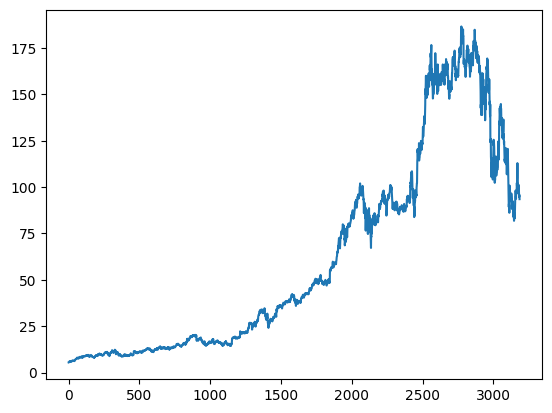

In [57]:
plt.plot(df.Close)

In [58]:
df

,Open,High,Low,Close,Volume
0,5.429000,5.634000,5.405500,5.463000,194814000
1,5.546000,5.564500,5.428000,5.457000,89542000
2,5.532500,5.626500,5.450000,5.503000,104386000
3,5.492000,5.681500,5.490500,5.671500,98820000
4,5.751000,5.874000,5.703500,5.811000,135500000
...,...,...,...,...,...
3180,97.800003,97.940002,95.650002,97.199997,60029400
3181,95.339996,95.610001,94.269997,94.580002,56580400
3182,95.099998,97.010002,94.800003,95.790001,59534100
3183,96.120003,96.430000,93.669998,95.820000,48467000


In [59]:
#this is to calculate moving average of 100 values
ma100 =df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3180    98.8534
3181    98.6551
3182    98.4329
3183    98.2431
3184    98.0481
Name: Close, Length: 3185, dtype: float64

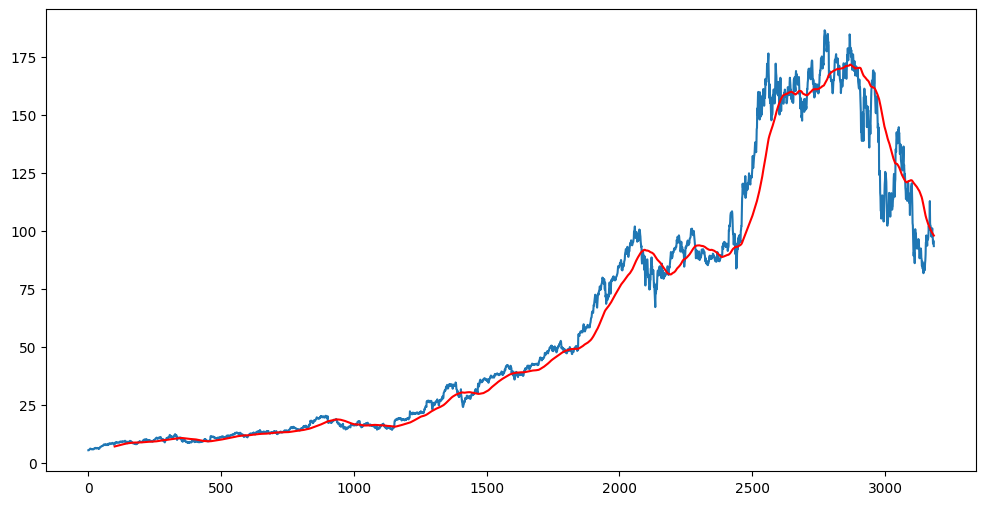

In [60]:
#12,6 is the size of the figure
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [61]:
#this is to calculate moving average of 100 values
ma200 =df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3180    109.988878
3181    109.832135
3182    109.729050
3183    109.634288
3184    109.557843
Name: Close, Length: 3185, dtype: float64

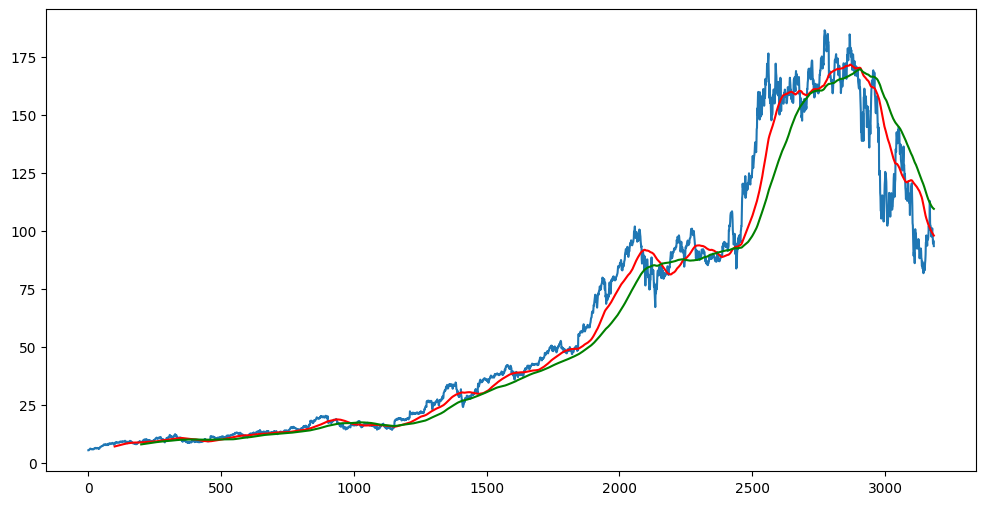

In [62]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [63]:
df.shape

(3185, 5)

In [64]:
#Splitting the data into training and testing 

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2229, 1)
(956, 1)


In [65]:
data_training.head()

,Close
0,5.4630
1,5.4570
2,5.5030
3,5.6715
4,5.8110


In [66]:
data_testing.head()

,Close
2229,94.499001
2230,91.134003
2231,92.005997
2232,93.557503
2233,95.378502


In [67]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [69]:
#SCALED DOWN THE TRAINING DATA 
data_training.head()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[6.21646816e-05],
       [0.00000000e+00],
       [4.76592599e-04],
       ...,
       [9.38607637e-01],
       [9.36934313e-01],
       [9.27661515e-01]])

In [70]:
#DIVIDING THE DATA INTO XTRAIN AND YTRAIN
x_train=[]
y_train=[]
for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [71]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [72]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [74]:
#Importing the model
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [75]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [77]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train ,y_train,epochs= 50)

Epoch 1/50
67/67 [==============================] - 13s 128ms/step - loss: 0.0290
Epoch 2/50
67/67 [==============================] - 8s 126ms/step - loss: 0.0060
Epoch 3/50
67/67 [==============================] - 9s 128ms/step - loss: 0.0060
Epoch 4/50
67/67 [==============================] - 9s 128ms/step - loss: 0.0047
Epoch 5/50
67/67 [==============================] - 9s 131ms/step - loss: 0.0047
Epoch 6/50
67/67 [==============================] - 9s 137ms/step - loss: 0.0040
Epoch 7/50
67/67 [==============================] - 9s 131ms/step - loss: 0.0037
Epoch 8/50
67/67 [==============================] - 9s 137ms/step - loss: 0.0035
Epoch 9/50
67/67 [==============================] - 9s 137ms/step - loss: 0.0041
Epoch 10/50
67/67 [==============================] - 9s 137ms/step - loss: 0.0036
Epoch 11/50
67/67 [==============================] - 9s 138ms/step - loss: 0.0035
Epoch 12/50
67/67 [==============================] - 9s 135ms/step - loss: 0.0030
Epoch 13/50
67/67 [=====

In [78]:
model.save('AMZN.h5')

In [79]:
data_testing.head()

,Close
2229,94.499001
2230,91.134003
2231,92.005997
2232,93.557503
2233,95.378502


In [80]:
# from keras.models import load_model
# model=load_model('final_model.h5')
past_100_days=data_training.tail(100)

In [81]:
data_testing.tail(100)

,Close
3085,115.879997
3086,121.089996
3087,120.949997
3088,120.300003
3089,114.559998
...,...
3180,97.199997
3181,94.580002
3182,95.790001
3183,95.820000


In [82]:
frames=[past_100_days,data_testing]
final_df=pd.concat(frames,ignore_index=True)
#final_df=past_100_days.append(data_testing, ignore_index=True)

In [83]:
final_df.head()

,Close
0,79.595497
1,76.045502
2,77.573997
3,74.753998
4,73.041496


In [84]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.10385557],
       [0.07411677],
       [0.08692119],
       ...,
       [0.23951918],
       [0.23977049],
       [0.22033553]])

In [85]:
input_data.shape

(1056, 1)

In [86]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [87]:
y_test

[0.2287042916986869,
 0.20051523699521268,
 0.20782005206056453,
 0.22081723377504536,
 0.23607199666223366,
 0.2199166427633924,
 0.21571554643396385,
 0.21510818596389503,
 0.21601293128792887,
 0.19749946185676548,
 0.20076654093800028,
 0.2062745200299213,
 0.1990534303371666,
 0.19785130015916774,
 0.18057345105504197,
 0.1460679880703487,
 0.16151122891462777,
 0.1652558621821567,
 0.1718989272415008,
 0.1927035319069086,
 0.21641085050150854,
 0.21769670605210456,
 0.21418669556534187,
 0.22046117724776426,
 0.220197282542838,
 0.2270497888586711,
 0.23347504012426634,
 0.2365829770850686,
 0.24052024262206906,
 0.2376343376798945,
 0.23872334273614004,
 0.22379945485195563,
 0.23199233407932007,
 0.23469391537678463,
 0.23023314256730887,
 0.24219564484898504,
 0.2472722145782874,
 0.2492366291219088,
 0.25087438688740515,
 0.2548158067367864,
 0.2698863098917629,
 0.28207921672932645,
 0.27523508295075316,
 0.2793943805063813,
 0.28357873176129045,
 0.2789336353071047,
 0.2714

In [88]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(956, 100, 1)
(956,)


In [89]:
#Making predictions

y_predicted = model.predict(x_test)

30/30 [==============================] - 2s 39ms/step


In [90]:
y_predicted.shape

(956, 1)

In [91]:
y_test

array([0.22870429, 0.20051524, 0.20782005, 0.22081723, 0.236072  ,
       0.21991664, 0.21571555, 0.21510819, 0.21601293, 0.19749946,
       0.20076654, 0.20627452, 0.19905343, 0.1978513 , 0.18057345,
       0.14606799, 0.16151123, 0.16525586, 0.17189893, 0.19270353,
       0.21641085, 0.21769671, 0.2141867 , 0.22046118, 0.22019728,
       0.22704979, 0.23347504, 0.23658298, 0.24052024, 0.23763434,
       0.23872334, 0.22379945, 0.23199233, 0.23469392, 0.23023314,
       0.24219564, 0.24727221, 0.24923663, 0.25087439, 0.25481581,
       0.26988631, 0.28207922, 0.27523508, 0.27939438, 0.28357873,
       0.27893364, 0.27144865, 0.26553016, 0.25992587, 0.26876797,
       0.27247905, 0.27512618, 0.26382127, 0.25093299, 0.23811598,
       0.2322855 , 0.21898678, 0.2141867 , 0.2007498 , 0.17641   ,
       0.18591807, 0.18825107, 0.20479175, 0.19419046, 0.18469919,
       0.20121054, 0.1755011 , 0.18101323, 0.18790345, 0.19776751,
       0.19159356, 0.20087545, 0.19296743, 0.16991355, 0.17797

In [92]:
k=scaler.scale_[0]

In [93]:
scale_factor=1/k
y_predicted = y_predicted * scale_factor 
y_test = y_test * scale_factor

In [94]:
y_predicted

array([[ 28.097542],
       [ 28.317583],
       [ 28.497908],
       [ 28.633425],
       [ 28.725094],
       [ 28.779512],
       [ 28.802914],
       [ 28.79988 ],
       [ 28.771229],
       [ 28.715874],
       [ 28.633657],
       [ 28.525486],
       [ 28.394028],
       [ 28.242466],
       [ 28.074526],
       [ 27.893227],
       [ 27.69457 ],
       [ 27.473284],
       [ 27.222013],
       [ 26.940462],
       [ 26.633482],
       [ 26.314053],
       [ 26.004177],
       [ 25.72449 ],
       [ 25.490494],
       [ 25.313473],
       [ 25.196857],
       [ 25.140482],
       [ 25.142363],
       [ 25.19819 ],
       [ 25.304192],
       [ 25.45688 ],
       [ 25.648462],
       [ 25.872057],
       [ 26.11864 ],
       [ 26.381268],
       [ 26.650452],
       [ 26.918232],
       [ 27.179783],
       [ 27.433495],
       [ 27.679708],
       [ 27.921755],
       [ 28.165983],
       [ 28.415771],
       [ 28.672482],
       [ 28.937181],
       [ 29.208557],
       [ 29.4

In [95]:
y_test.shape

(956,)

In [96]:
y_predicted.shape


(956, 1)

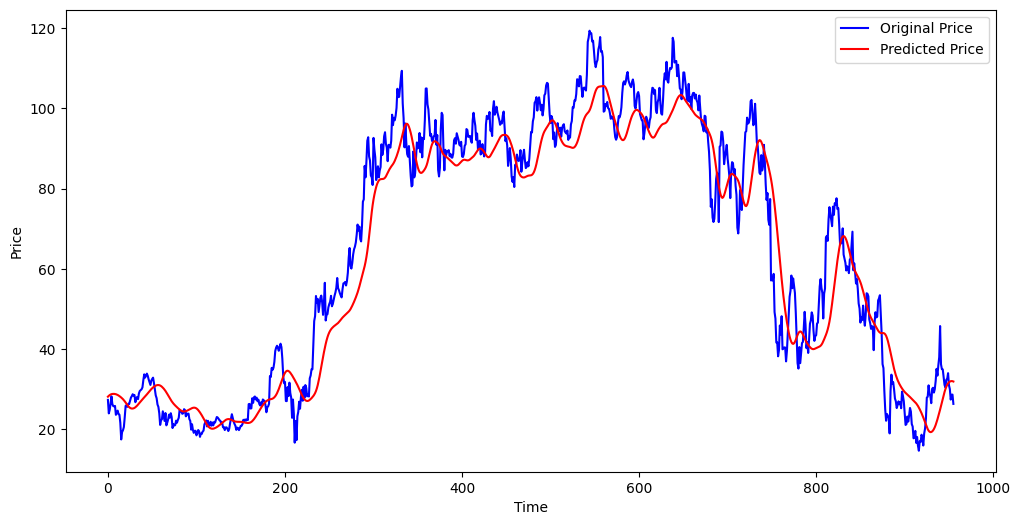

In [97]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label = 'Original Price')
plt.plot(y_predicted, 'r' ,label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()